# Name Entity recognization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [18]:
book = pd.read_csv("Elon_musk.csv",encoding='latin1', error_bad_lines = False)

book

C:\Users\DELL\AppData\Local\Temp\ipykernel_8272\117320703.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book = pd.read_csv("Elon_musk.csv",encoding='latin1', error_bad_lines = False)


,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [7]:
#for understanding purpose
name = "       bjfviygviuyv      "

name.strip()

'bjfviygviuyv'

In [19]:
book = [x.strip() for x in book.Text] # remove both the leading and the trailing characters
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [12]:
##Part Of Speech Tagging
#nlp = spacy.load('en')
nlp = spacy.load('en_core_web_sm')

In [32]:
one_block=book[450]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
one_block

'RT @SpaceX: Falcon 9\x92s first stage has landed on Landing Zone 1 https://t.co/mR18Qv3GoC'

In [35]:
for token in doc_block[:]:
    print(token,token.pos_)

RT PROPN
@SpaceX PROPN
: PUNCT
Falcon PROPN
9s NUM
first ADJ
stage NOUN
has AUX
landed VERB
on ADP
Landing PROPN
Zone PROPN
1 NUM
https://t.co/mR18Qv3GoC NOUN


In [40]:
#filtering for nouns and verb only
noun_verb=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]

print(noun_verb)

['stage', 'landed', 'https://t.co/mR18Qv3GoC']


In [41]:
len(noun_verb)

3

In [54]:
#counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

x = cv.fit_transform(noun_verb)
x

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [55]:
#for understanding purpose
temp =['HI Hello how r u',
       'Hello listen plz plz plz',
       'how dare you']

cv1 = CountVectorizer()

xyz = cv1.fit_transform(temp)

print(cv1.get_feature_names())

pd.DataFrame(xyz.toarray(),
             columns = cv1.get_feature_names())

['dare', 'hello', 'hi', 'how', 'listen', 'plz', 'you']


,dare,hello,hi,how,listen,plz,you
0,0,1,1,1,0,0,0
1,0,1,0,0,1,3,0
2,1,0,0,1,0,0,1


In [56]:
x.shape

(3, 5)

In [57]:
x,toarray()

array([[0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 1, 0, 1, 0]], dtype=int64)

In [58]:
cv.get_feature_names()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['co', 'https', 'landed', 'mr18qv3goc', 'stage']

In [59]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(x.toarray(), columns = cv.get_feature_names())
temp_df

,co,https,landed,mr18qv3goc,stage
0,0,0,0,0,1
1,0,0,1,0,0
2,1,1,0,1,0


In [60]:
sum_words = x.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1, 1, 1]], dtype=int64)

In [61]:
type(sum_words)

numpy.matrix

In [62]:
cv.vocabulary_

{'stage': 4, 'landed': 2, 'https': 1, 'co': 0, 'mr18qv3goc': 3}

In [63]:
sorted(cv.vocabulary_)

['co', 'https', 'landed', 'mr18qv3goc', 'stage']

In [64]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word,count
0,co,1
1,https,1
2,landed,1
3,mr18qv3goc,1
4,stage,1


In [65]:
wf_df.sort_values(by = 'count',
                  ascending = False,
                  inplace = True,
                  ignore_index = True)
wf_df

,word,count
0,co,1
1,https,1
2,landed,1
3,mr18qv3goc,1
4,stage,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

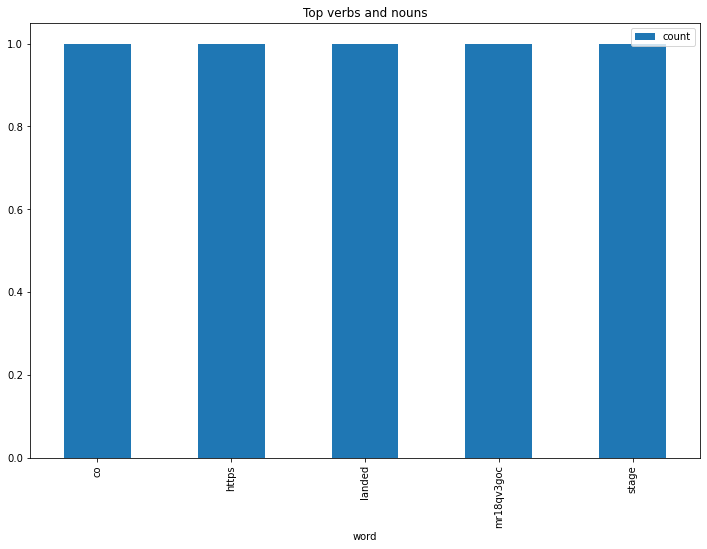

In [66]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

#All words
#wf_df.plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

# emotion mining

In [80]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')
afinn.head(50)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8272\1252315759.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  afinn = pd.read_csv('Afinn.csv', error_bad_lines=False, sep = ",", encoding = 'latin-1')


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
5,abductions,-2
6,abhor,-3
7,abhorred,-3
8,abhorrent,-3
9,abhors,-3


In [68]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [69]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(book))

#sentences[5:15]
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [71]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [83]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df.head(50)

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
5,Happy New Year of the Ox!
6,https://t.co/9WFKMYu2oj Frodo was the underdog...
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...
8,Tweets definitely do not represent real-world ...
9,The most entertaining outcome is the most like...


In [72]:
nlp = spacy.load('en_core_web_sm')

In [73]:
mydict = {'A' : 3,
         'B' : 8,
         'C' : 2}

mydict.get('D', 0)

0

In [74]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [91]:
# test that it works
calculate_sentiment(text ='good')

3

In [92]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [93]:
sent_df

,sentence,sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0
920,"It may never pay out, as the stock cant b ht...",-4
921,Details Aug 28.,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [94]:
sent_df.iloc[4,0]

'Now on to the next for even more!!'

In [95]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,3,4
3,@gtera27 Doge is underestimated @teslacn Congr...,3,13
4,Now on to the next for even more!!,0,8
...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...",0,11
920,"It may never pay out, as the stock cant b ht...",-4,31
921,Details Aug 28.,0,3
922,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [96]:
sent_df.sort_values(by='sentiment_value').tail()

,sentence,sentiment_value,word_count
645,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
585,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
719,We just havent observed the https://t.co/mez...,15,72
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [97]:
sent_df.sort_values(by='sentiment_value').head()

,sentence,sentiment_value,word_count
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61
680,"Occasional flights from land are ok, but frequ...",-4,39
886,This is primarily an electrical/electronic (ch...,-4,69


In [98]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    924.00000
mean       1.37013
std        2.67799
min       -8.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       16.00000
Name: sentiment_value, dtype: float64

In [99]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


In [100]:
sent_df[sent_df['sentiment_value']<-5]

,sentence,sentiment_value,word_count
64,"Also, the road to hell is mostly paved with ba...",-7,11
647,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
837,Cool Model 3 review by @iamjamiefoxx https://t...,-6,61


In [101]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence']

64     Also, the road to hell is mostly paved with ba...
647    Very ba
 https://t.co/tJsh1Exz1Q @justpaulinel...
837    Cool Model 3 review by @iamjamiefoxx https://t...
Name: sentence, dtype: object

In [102]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()

['Also, the road to hell is mostly paved with bad intentions.',
 'Very ba\x85 https://t.co/tJsh1Exz1Q @justpaulinelol It\x92s too embarrassing Just learned that my physics prof from Penn is head of Fermilab &amp; still has some of my old homework <U+263A><U+FE0F> @ruskin147 It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing\x85 https://t.co/OFFoojCqNv @l_vaux @kulpability @tlowdon @EthicalSkeptic People are extremely unlikely to die of Covid/sars-cov2 alone.',
 'Cool Model 3 review by @iamjamiefoxx https://t.co/hJDD7BjkE3 @teslacn Tesla will add a power lift gate at no cost @HansNoordsij Agreed, hydrogen fool sells make no sense Pronouns suck @historyofarmani Also, we get our lithium from Australia @nichegamer <U+0001F923><U+0001F923> @akinfermo Yeah, would have been way better just to send everyone $6k I bet no one on <U+0001F339> Twitter even *has* a guillotine!']

In [103]:
sent_df[sent_df['sentiment_value']<-5].head()['sentence'].tolist()[0]

'Also, the road to hell is mostly paved with bad intentions.'

In [104]:
sent_df['index'] = range(0, len(sent_df))

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

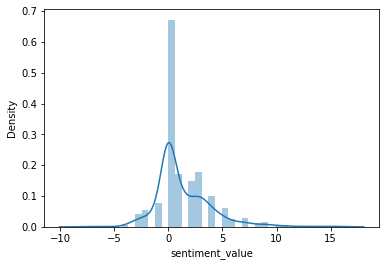

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

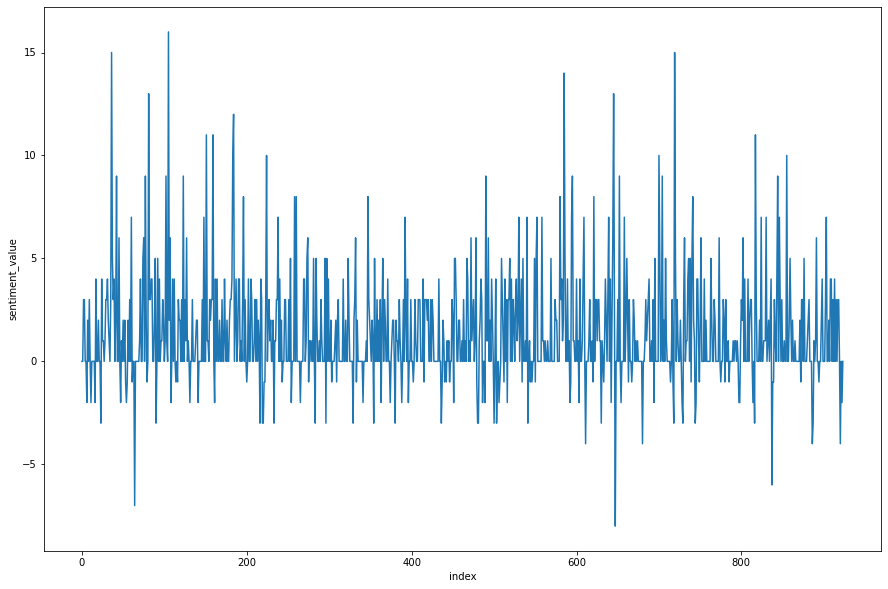

In [106]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

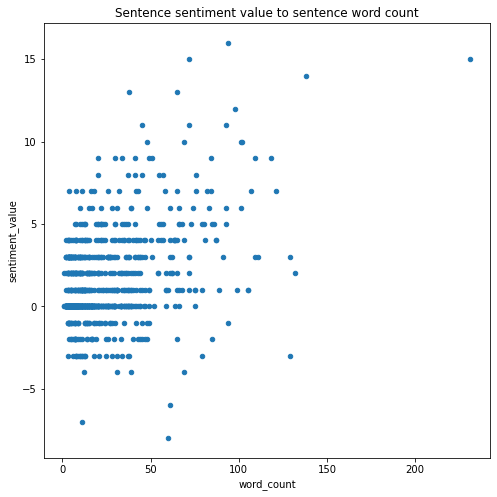

In [107]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(8,8),
                     title='Sentence sentiment value to sentence word count')